In [49]:
import graphviz
from pathlib import Path

savepath = Path("~/Documents/MA/ma_latex/images/40_design/").expanduser()

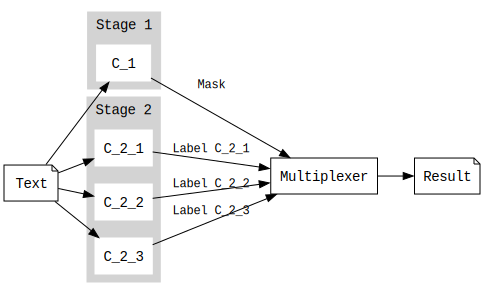

In [51]:
dot = graphviz.Digraph(
    "multiplexer",
    comment="Multiplexer",
    format="png",
    node_attr={"shape": "box", "rankdir": "LR"},
)
dot.attr(rankdir="LR")
dot.attr(splines="line")
dot.attr(fontname="Courier New")
dot.node_attr.update(fontname="Courier New")

with dot.subgraph(name="cluster_c1") as c:
    c.attr(
        style="filled",
        color="lightgrey",
    )
    c.node_attr.update(style="filled", color="white", fontname="Courier New")
    c.node("C_1", "C_1")
    c.attr(label="Stage 1")


with dot.subgraph(name="cluster_c2") as c2:
    c2.attr(style="filled", color="lightgrey")
    c2.node_attr.update(style="filled", color="white", fontname="Courier New")
    c2.node("C_2_1", "C_2_1")
    c2.node("C_2_2", "C_2_2")
    c2.node("C_2_3", "C_2_3")
    c2.attr(label="Stage 2")

dot.node("TEXT", "Text", shape="note")
dot.node("RESULT", "Result", shape="note")

dot.node("MUX", "Multiplexer")


dot.edge("TEXT", "C_1")
dot.edge(
    "TEXT",
    "C_2_1",
)
dot.edge(
    "TEXT",
    "C_2_2",
)
dot.edge(
    "TEXT",
    "C_2_3",
)


dot.edge("C_1", "MUX", label="Mask", fontname="Courier New", fontsize="12")
dot.edge(
    "C_2_1", "MUX", label="Label C_2_1", fontname="Courier New", fontsize="12"
)
dot.edge(
    "C_2_2", "MUX", label="Label C_2_2", fontname="Courier New", fontsize="12"
)
dot.edge(
    "C_2_3", "MUX", label="Label C_2_3", fontname="Courier New", fontsize="12"
)

dot.edge("MUX", "RESULT")


dot.render(directory=savepath).replace("\\", "/")
dot

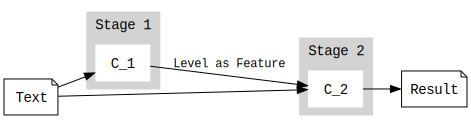

In [52]:
dot = graphviz.Digraph(
    "feature_engineering",
    comment="Feature Engineering",
    format="png",
    node_attr={"shape": "box", "rankdir": "LR"},
)
dot.attr(rankdir="LR")
dot.attr(splines="line")
dot.attr(fontname="Courier New")
dot.node_attr.update(fontname="Courier New")

with dot.subgraph(name="cluster_c1") as c:
    c.attr(
        style="filled",
        color="lightgrey",
    )
    c.node_attr.update(style="filled", color="white", fontname="Courier New")
    c.node("C_1", "C_1")
    c.attr(label="Stage 1")


with dot.subgraph(name="cluster_c2") as c2:
    c2.attr(style="filled", color="lightgrey")
    c2.node_attr.update(style="filled", color="white", fontname="Courier New")
    c2.node("C_2", "C_2")
    c2.attr(label="Stage 2")

dot.node("TEXT", "Text", shape="note")
dot.node("RESULT", "Result", shape="note")


dot.edge("TEXT", "C_1")
dot.edge(
    "TEXT",
    "C_2",
)
dot.edge(
    "C_1",
    "C_2",
    fontname="Courier New",
    fontsize="12",
    label="Level as Feature",
)


dot.edge("C_2", "RESULT")

dot.render(directory=savepath).replace("\\", "/")

dot

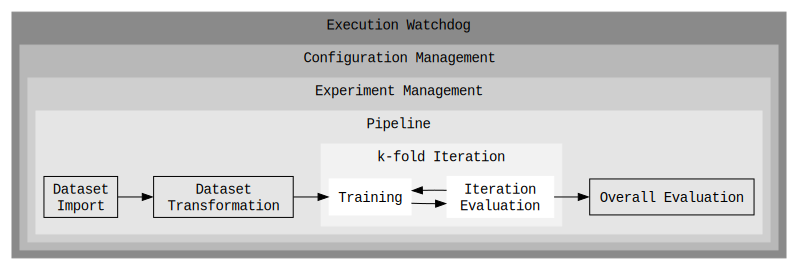

In [77]:
dot = graphviz.Digraph(
    "experiment",
    comment="experiment schema",
    format="png",
    node_attr={"shape": "box", "rankdir": "LR"},
)
dot.attr(rankdir="LR")

dot.attr(fontname="Courier New")
dot.node_attr.update(fontname="Courier New")

with dot.subgraph(name="cluster_watchdog") as wat:
    wat.attr(
        style="filled",
        color="grey54",
    )
    wat.attr(label="Execution Watchdog")

    with wat.subgraph(name="cluster_config") as con:
        con.attr(
            style="filled",
            color="grey72",
        )
        con.attr(label="Configuration Management")

        with con.subgraph(name="cluster_mlflow") as mlflow:
            mlflow.attr(
                style="filled",
                color="grey81",
            )
            mlflow.attr(label="Experiment Management")

            with mlflow.subgraph(name="cluster_pipeline") as pipeline:
                pipeline.attr(
                    style="filled",
                    color="grey90",
                )
                pipeline.attr(label="Pipeline")

                pipeline.node("1", "Dataset\n Import")
                pipeline.node("2", "Dataset\n Transformation")

                with pipeline.subgraph(name="cluster_c1") as c:
                    c.attr(
                        style="filled",
                        color="grey95",
                    )
                    c.node_attr.update(
                        style="filled", color="white", fontname="Courier New"
                    )
                    c.attr(label="k-fold Iteration")

                    c.node("B", "Training")
                    c.node("C", "Iteration\n Evaluation")

                pipeline.node("4", "Overall Evaluation")

                pipeline.edges(["12", "2B", "BC", "CB", "C4"])


dot.render(directory=savepath).replace("\\", "/")

dot


dot